# Explore Phytoplankton in Tara

In [1]:
# imports

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from datetime import datetime, time
import random 

import pandas
import seaborn as sns

from oceancolor.tara import io as tara_io
from oceancolor.ph import pigments
from oceancolor.ph import load_data
from oceancolor.hydrolight import loisel23
from oceancolor.utils import cat_utils

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf
from cnmf import io as cnmf_io

In [2]:
%matplotlib ipympl

# Load

## NMF

In [3]:
nmf_fit = 'Tara'
N_NMF, iop = 4, 'a'
d = cnmf_io.load_nmf(nmf_fit, N_NMF, iop)
M = d['M']
coeff = d['coeff']
NMF_wave = d['wave']

Loading: /home/xavier/Projects/Oceanography/python/cnmf/cnmf/data/Tara/Tara_NMF_04_a.npz


## Phytoplankton

In [4]:
df_moore = load_data.moore1995()
df_moore.head()

AttributeError: module 'oceancolor.ph.load_data' has no attribute 'moore1995'

# Reconstruct without the NAP term

In [5]:
coeff.shape

(239880, 4)

In [6]:
M.shape

(4, 59)

In [7]:
coeff[:,0] = 0.
recon = np.dot(coeff, M)

# Def

In [18]:
def plot_one(idx):
    fig = plt.figure(figsize=(7,5))
    
    plt.clf()
    ax = plt.gca()
    #
    iwv = np.argmin(np.abs(NMF_wave-675.))
    ax.plot(NMF_wave, recon[idx]/recon[idx,iwv], 'k', label=f'NMF: {idx}')
    
    iwv = np.argmin(np.abs(df_moore.wave-675.))
    for key in df_moore.keys():
        if key == 'wave':
            continue
        ax.plot(df_moore.wave, df_moore[key]/df_moore[key][iwv], ':', label=key)
    #
    ax.set_xlabel('Chl 675nm from NMF')
    ax.set_ylabel(r'$a_{ph}$ normalized at 675nm')
    ax.legend()
    #
    plt.show()

# Random Examples

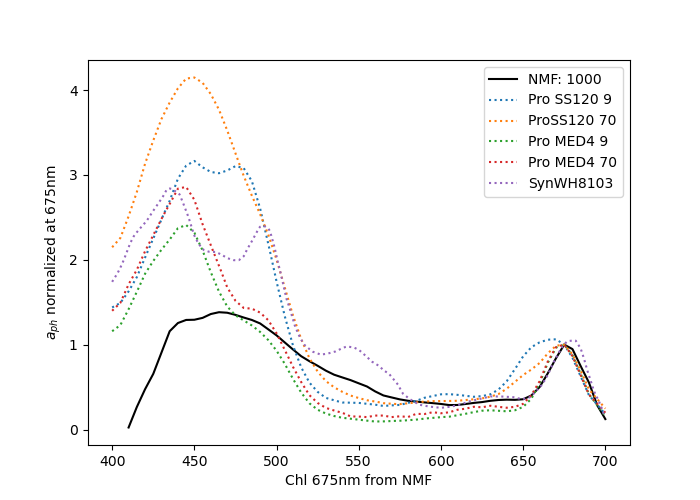

In [19]:
plot_one(1000)

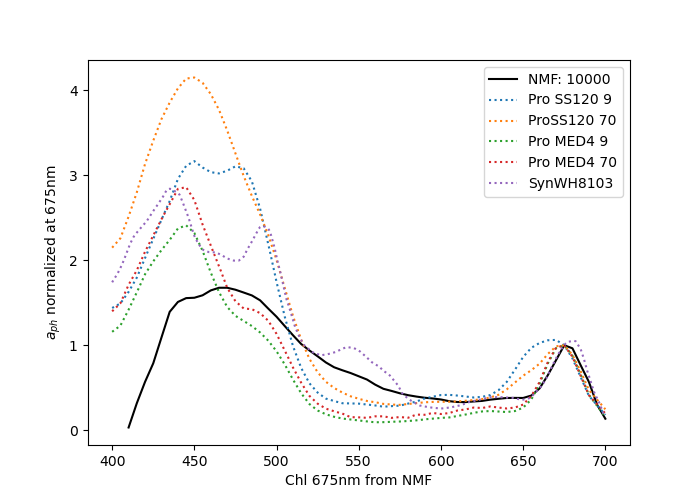

In [21]:
plot_one(10000)

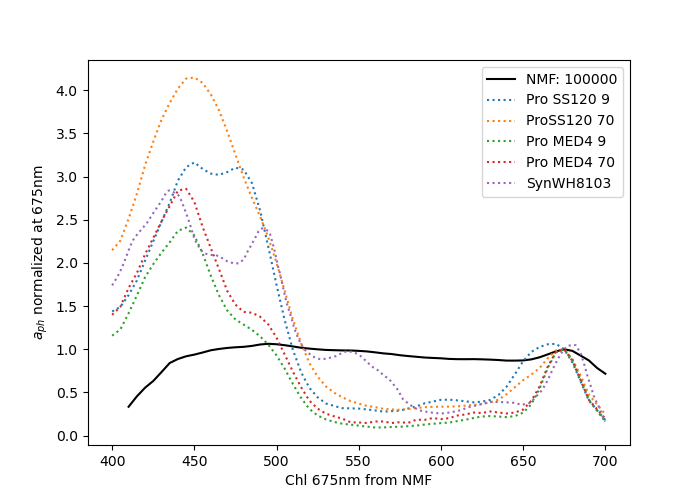

In [22]:
plot_one(100000)

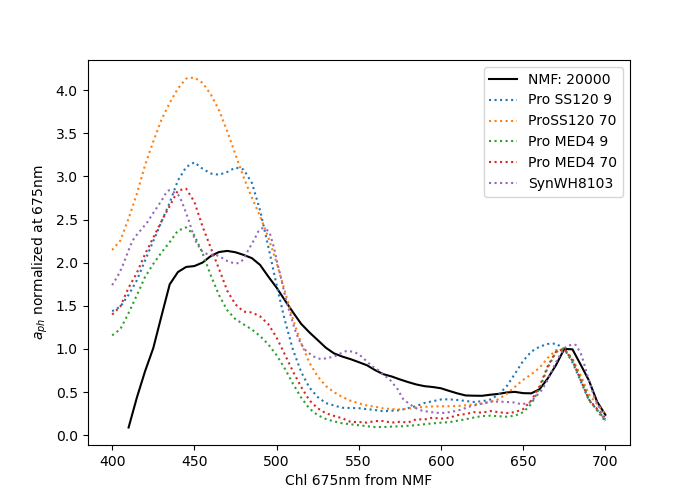

In [24]:
plot_one(20000)